<a href="https://colab.research.google.com/github/Debraj-80/CardioPredict-Machine-Learning-Based-Heart-Disease-Prediction-System/blob/main/heart_disease_prediction_improved_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Last 5 rows
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1     

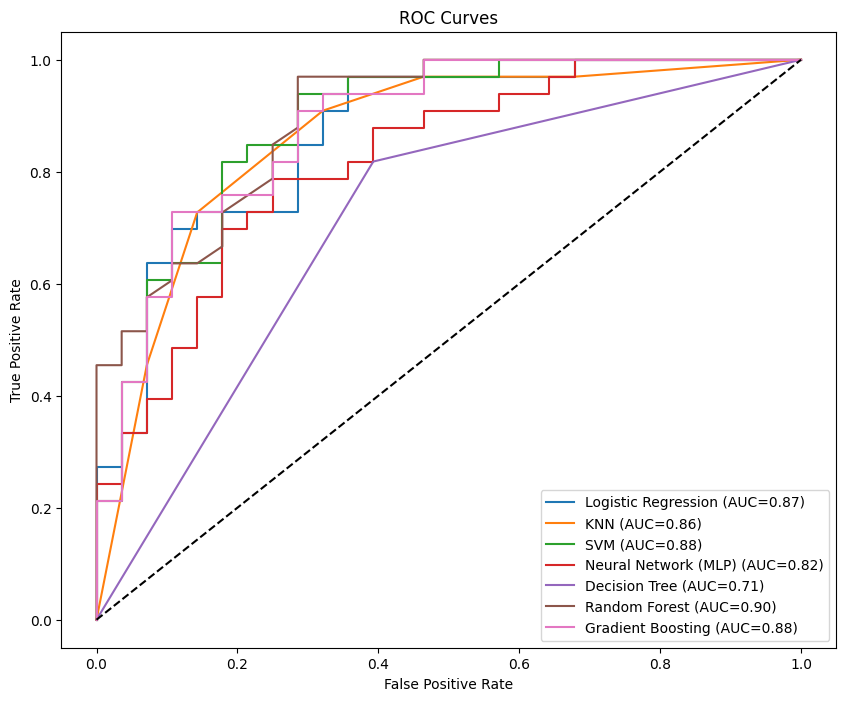


🔮 Predictions for New Patient:

Logistic Regression: 💔 Heart Disease (prob=0.71)
KNN: ✅ Healthy Heart (prob=0.40)
SVM: 💔 Heart Disease (prob=0.65)
Neural Network (MLP): 💔 Heart Disease (prob=0.98)
Decision Tree: 💔 Heart Disease (prob=1.00)
Random Forest: 💔 Heart Disease (prob=0.78)
Gradient Boosting: 💔 Heart Disease (prob=0.97)

📊 Model Comparison (Console View):
+----------------------+------------------------+------------+
|        Model         | Probability of Disease | Prediction |
+----------------------+------------------------+------------+
| Logistic Regression  |        0.708461        |    Yes     |
|         KNN          |        0.400000        |     No     |
|         SVM          |        0.646500        |    Yes     |
| Neural Network (MLP) |        0.975717        |    Yes     |
|    Decision Tree     |        1.000000        |    Yes     |
|    Random Forest     |        0.780000        |    Yes     |
|  Gradient Boosting   |        0.967707        |    Yes     |
+--

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1889645453.py:146: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  ).applymap(


,Model,Probability of Disease,Prediction
0,Decision Tree,1.000000,Yes
1,Neural Network (MLP),0.975717,Yes
2,Gradient Boosting,0.967707,Yes
3,Random Forest,0.780000,Yes
4,Logistic Regression,0.708461,Yes
5,SVM,0.646500,Yes
6,KNN,0.400000,No


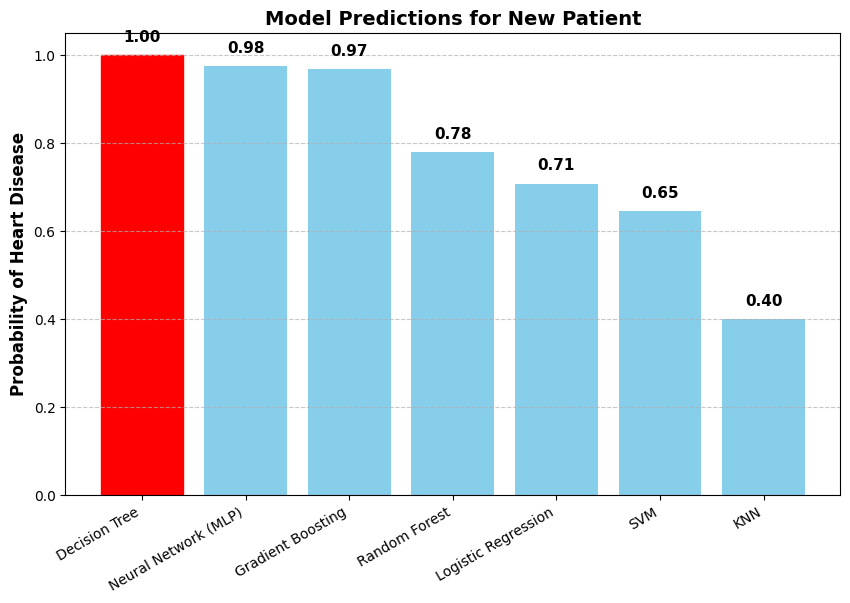

In [11]:
# -*- coding: utf-8 -*-
"""Heart Disease Prediction with Multiple ML Models"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1. Load dataset
url = "https://raw.githubusercontent.com/Debraj-80/CardioPredict-Machine-Learning-Based-Heart-Disease-Prediction-System/e960ce3386591a693d9ad3f7545a85a8a1491c4b/heart.csv"
df = pd.read_csv(url)

# First 5 rows
print("First 5 rows")
print(df.head())

# Last 5 rows
print("Last 5 rows")
print(df.tail())

# Features and labels
X = df.drop("target", axis=1)
y = df["target"]

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. FEATURE SCALING
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

# 5. Train & Evaluate
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results[name] = {"Accuracy": acc, "ROC-AUC": auc}

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

    print(f"\n==== {name} ====")
    print("Accuracy:", acc)
    print("ROC-AUC:", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# 6. Predict New Patient Input with ALL Models
# Example input (same order as dataset):
# age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
input_data = (37,1,2,130,250,0,1,187,0,3.5,0,0,2)

# Convert to numpy array
df_array = np.asarray(input_data)
reshaped_data = df_array.reshape(1,-1)

# Scale input
reshaped_data_scaled = scaler.transform(reshaped_data)

print("\n🔮 Predictions for New Patient:\n")
patient_probs = {}

for name, model in models.items():
    prediction = model.predict(reshaped_data_scaled)
    prob = model.predict_proba(reshaped_data_scaled)[0][1]
    patient_probs[name] = prob

    if prediction[0] == 1:
        print(f"{name}: 💔 Heart Disease (prob={prob:.2f})")
    else:
        print(f"{name}: ✅ Healthy Heart (prob={prob:.2f})")

# ==============================
# Console PrettyTable
# ==============================
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Probability of Disease", "Prediction"]

for model, prob in patient_probs.items():
    prediction = "Yes" if prob >= 0.5 else "No"
    table.add_row([model, f"{prob:.6f}", prediction])

print("\n📊 Model Comparison (Console View):")
print(table)

# ==============================
# Pandas DataFrame (for Jupyter/Colab)
# ==============================
from IPython.display import display

results_df = pd.DataFrame({
    "Model": list(patient_probs.keys()),
    "Probability of Disease": list(patient_probs.values())
})

results_df["Prediction"] = results_df["Probability of Disease"].apply(lambda x: "Yes" if x >= 0.5 else "No")
results_df = results_df.sort_values(by="Probability of Disease", ascending=False).reset_index(drop=True)

# Style if in Jupyter
try:
    styled = results_df.style.set_table_styles(
        [{'selector': 'th', 'props': [('background-color', '#2d7dd2'),
                                      ('color', 'white'),
                                      ('font-weight', 'bold')]}]
    ).applymap(
        lambda x: 'color: green; font-weight:bold;' if x=="Yes" else 'color: red; font-weight:bold;',
        subset=["Prediction"]
    )
    display(styled)
except:
    print("\n(DataFrame styled output skipped; showing plain DataFrame)\n")
    print(results_df)

# ==============================
# Visualization (Bar Chart)
# ==============================
plt.figure(figsize=(10,6))
bars = plt.bar(results_df["Model"], results_df["Probability of Disease"], color="skyblue")
bars[0].set_color("red")

plt.title("Model Predictions for New Patient", fontsize=14, fontweight="bold")
plt.ylabel("Probability of Heart Disease", fontsize=12, fontweight="bold")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, prob in enumerate(results_df["Probability of Disease"]):
    plt.text(i, prob + 0.03, f"{prob:.2f}", ha="center", fontsize=11, fontweight="bold")

plt.show()